# Natural Language Processing

Natural Langugage Processing is a subset of machine learning which involves processing text and building a classifier. It is a vast domain, with various algorithms and techniques, and multiple approaches to a given problem.
In this project, we attempt to classify yelp reviews into 1 star or 5 star reviews based off the text context in the reviews.

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib as pyplot
import seaborn as sns
%matplotlib inline

In [3]:
yelp = pd.read_csv('yelp.csv')
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [19]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [18]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


## Sample Reviews

In [48]:
# cool review
print(yelp[yelp["cool"] == yelp["cool"].max()]["text"].iloc[0])

Love this place! Amazing Happy Hour Specials!!


In [45]:
# useful review
print(yelp[yelp["useful"] == yelp["useful"].max()]["text"].iloc[0])

Love this place! Amazing Happy Hour Specials!!


In [43]:
# funny review
print(yelp[yelp["funny"] == yelp["funny"].max()]["text"].iloc[0])

Scary things to me:
Paris Hilton has a career. 
Sarah Palin. Really. She's like the new Anita Bryant. 
My fathers' overgrown eyebrows. Trim, daddy, trim!
Droves of high schoolers leaving school just as I'm trying to find Barrio Cafe. 

Seriously. Like thousands of them. And I couldn't find the damn restaurant. What was I gonna do? Roll down the window (well, not roll down, seriously, who rolls down windows anymore?) and holler out in my best lispy voice, "Hey, squeeze me fellas, I'm going to a wine tasting at the Barrio Cafe. Y'all know where that is?" Since all teenagers carry guns, yes, that scared me. 

Finally. I found it. And entered. 

Cute. Cozy. Middle of the day, so empty. Great, vibrant art. And a very attentive and friendly staff. Often times at this time of day, restaurants really drop the ball. No ball dropping here.
I had La Paloma margarita which is made with a grapefruit soda. Think Squirt and Patron! And after a couple of these babies I was in el bano squirting out tha

In [22]:
yelp["text_length"] = yelp["text"].apply(len)
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


## Data Visualistion

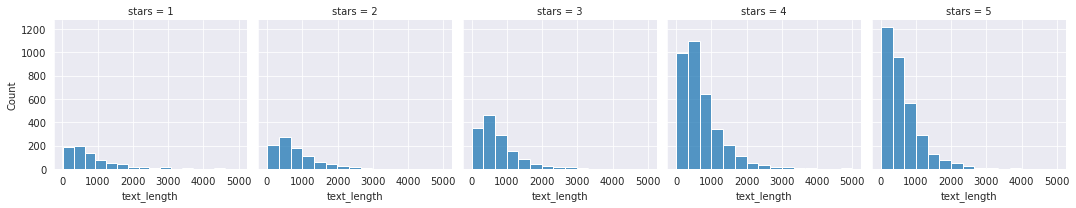

In [25]:
sns.set_style("darkgrid")
g = sns.FacetGrid(yelp,col="stars")
g.map(sns.histplot,"text_length",bins=15)

<AxesSubplot:xlabel='stars', ylabel='text_length'>

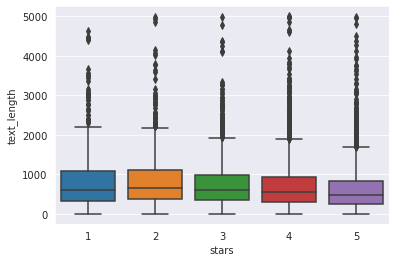

In [27]:
sns.boxplot(data=yelp,x="stars",y="text_length")

<AxesSubplot:xlabel='stars', ylabel='count'>

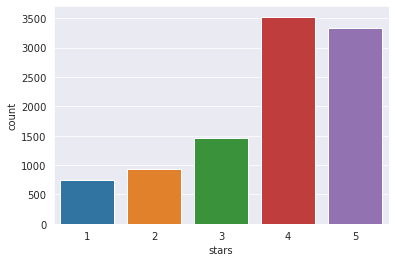

In [28]:
sns.countplot(data=yelp,x="stars")

In [29]:
group_by = yelp.groupby(["stars"]).mean()

In [30]:
group_by

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [31]:
group_by_corr = yelp.corr()

In [32]:
group_by_corr

,stars,cool,useful,funny,text_length
stars,1.000000,0.052555,-0.023479,-0.061306,-0.114674
cool,0.052555,1.000000,0.887102,0.764342,0.241451
useful,-0.023479,0.887102,1.000000,0.723406,0.293975
funny,-0.061306,0.764342,0.723406,1.000000,0.251760
text_length,-0.114674,0.241451,0.293975,0.251760,1.000000


<AxesSubplot:>

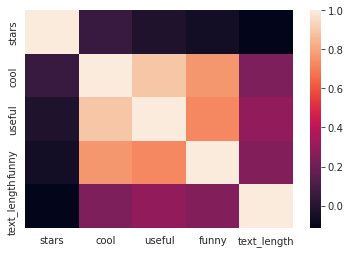

In [33]:
sns.heatmap(group_by_corr)

Let us filter out the 2,3,4 star reviews since our model is for classifying 1 or 5 stars.

In [64]:
yelp_class = yelp[(yelp["stars"]==1)|(yelp["stars"]==5)]

In [65]:
yelp_class.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


In [63]:
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  text_length  4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


Now we will split the data into x and y

In [66]:
X = yelp_class["text"]
y = yelp_class["stars"]

We use the CountVectorizer to vectorize each review into a bag of words. For example:
"Red bag"    (red, blue, bag) = (1, 0, 1)
"Blue bag"   (red, blue, bag) = (0, 1, 1)

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

In [68]:
cv = CountVectorizer()

In [70]:
X = cv.fit_transform(X)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Using the Naive Bayes Model

In [76]:
from sklearn.naive_bayes import MultinomialNB

In [77]:
nb = MultinomialNB()

In [78]:
nb.fit(X_train, y_train)

MultinomialNB()

In [79]:
pred = nb.predict(X_test)

In [80]:
from sklearn.metrics import classification_report, confusion_matrix

In [81]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           1       0.70      0.88      0.78       181
           5       0.98      0.93      0.96      1045

    accuracy                           0.93      1226
   macro avg       0.84      0.91      0.87      1226
weighted avg       0.94      0.93      0.93      1226



In [82]:
print(confusion_matrix(pred, y_test))

[[159  22]
 [ 69 976]]


## Using Term Frequency-Inverse Term Frequency Transformer

Term Frequency = (No of occurences of word in sentence)/(Total no of words)<br>
Inverse Term Frequency = (No of occurences of word one or more times in all documents)/(Total no of documents)

In [85]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [97]:
Xtext = yelp_class["text"]
y = yelp_class["stars"]
Xtrain, Xtest, ytrain, ytest = train_test_split(Xtext,y)

## Using a pipeline
sklearn supports using of a pipeline when multiple stages are involved in the creation of the model. Since we are using the TfIdf trasnformer, our pipeline needs to have 3 stages.
<ol>
    <li>Bag of Words : CountVectorizer()</li>
    <li>Term-Frequency Inverse Term-Frequency : TfidfTransformer()</li>
    <li>Naive Bayes Algorithm : MultinomialNB()</li>
</ol>

In [98]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('NaiveBayes', MultinomialNB())
])

In [99]:
pipeline.fit(Xtrain,ytrain)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('NaiveBayes', MultinomialNB())])

In [100]:
predictions = pipeline.predict(Xtest)

In [102]:
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       181
           5       0.82      1.00      0.90       841

    accuracy                           0.82      1022
   macro avg       0.41      0.50      0.45      1022
weighted avg       0.68      0.82      0.74      1022



/home/bogeymantan/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bogeymantan/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bogeymantan/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Sometimes, using a TfIdf Classifier makes things worse. Clearly, this is the case. Let us create a final pipeline without the tf-idf.

In [103]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('NaiveBayes', MultinomialNB())
])
pipeline.fit(Xtrain,ytrain)
predictions = pipeline.predict(Xtest)
print(classification_report(ytest, predictions))
print(confusion_matrix(ytest, predictions))

              precision    recall  f1-score   support

           1       0.86      0.64      0.73       181
           5       0.93      0.98      0.95       841

    accuracy                           0.92      1022
   macro avg       0.89      0.81      0.84      1022
weighted avg       0.91      0.92      0.91      1022

[[116  65]
 [ 19 822]]
